In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Neural Process for age estimation stochastic process

This notebook shows how to train and sample from a Neural Process for age estimation

We select the FG-net, each person as a batch. In each batch, there are 18 persons.


In [2]:
from datasets import FaceFeatureData

# Create dataset

dataset = FaceFeatureData(num_of_people=3,num_of_images=18)

#82 different people(batch_num)
#18 different images each people(batch_size)
#x_dim = 2048


### Build Neural Process

In [3]:
from neural_process import NeuralProcess

x_dim = 2048
y_dim = 1
r_dim = 50  # Dimension of representation of context points
z_dim = 50  # Dimension of sampled latent variable
h_dim = 50  # Dimension of hidden layers in encoder and decoder

neuralprocess = NeuralProcess(x_dim, y_dim, r_dim, z_dim, h_dim)

### Train Neural Process


Epoch: 0, Avg_loss: 15460.656412760416
Epoch: 1, Avg_loss: 14594.693522135416
Epoch: 2, Avg_loss: 13731.248860677084
Epoch: 3, Avg_loss: 12721.38232421875
Epoch: 4, Avg_loss: 11822.476236979166
Epoch: 5, Avg_loss: 10954.656575520834
Epoch: 6, Avg_loss: 9743.961263020834
Epoch: 7, Avg_loss: 8528.200358072916
Epoch: 8, Avg_loss: 7703.194580078125
Epoch: 9, Avg_loss: 6374.939697265625
Epoch: 10, Avg_loss: 5467.244954427083
Epoch: 11, Avg_loss: 4883.371826171875
Epoch: 12, Avg_loss: 3996.8824869791665
Epoch: 13, Avg_loss: 3155.6392822265625
Epoch: 14, Avg_loss: 2644.724650065104
Epoch: 15, Avg_loss: 2220.04296875
Epoch: 16, Avg_loss: 1814.9436848958333
Epoch: 17, Avg_loss: 1569.371602376302
Epoch: 18, Avg_loss: 1328.9509684244792
Epoch: 19, Avg_loss: 1040.9008687337239
Epoch: 20, Avg_loss: 875.2627461751302
Epoch: 21, Avg_loss: 731.4236653645834
Epoch: 22, Avg_loss: 610.3392435709635
Epoch: 23, Avg_loss: 519.0230560302734
Epoch: 24, Avg_loss: 439.87135823567706
Epoch: 25, Avg_loss: 345.919

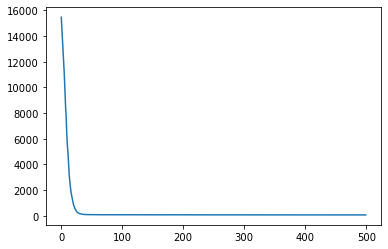

In [4]:
from torch.utils.data import DataLoader
from training import NeuralProcessTrainer

batch_size = 1
num_context = 17
num_target = 1

data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
optimizer = torch.optim.Adam(neuralprocess.parameters(), lr=3e-4)
np_trainer = NeuralProcessTrainer(device, neuralprocess, optimizer,
                                  num_context_range=(num_context, num_context),
                                  num_extra_target_range=(num_target, num_target), 
                                  print_freq=200)

neuralprocess.training = True
np_trainer.train(data_loader, 500)
plt.plot(range(len(np_trainer.epoch_loss_history)),np_trainer.epoch_loss_history)
plt.show()


### predict without context



In [5]:
# for batch in data_loader:
#     break
# x_target, y_target = batch
# print(y_target)
# # print(x_target)
# # print(x_target.size())
# for i in range(10):
#     z_sample = torch.randn((1, z_dim))
#     mu, _ = neuralprocess.xz_to_y(x_target, z_sample)
#     print(mu.detach())



### predict with context


In [6]:
from utils import context_target_split

for batch in data_loader:
    break

# Use batch to create random set of context points
x, y = batch
# print(x.size())
x_context, y_context, _, _ = context_target_split(x[0:1], y[0:1], 
                                                  num_context, 
                                                  num_target)
# print(x_context.size())
neuralprocess.training = False
from datasets import FaceFeatureTestData

testDataset = FaceFeatureTestData()
testData_loader = DataLoader(testDataset, batch_size=batch_size, shuffle=True)
for x_target, y_target in testData_loader:
    # print('target size:')
    # print(x_target.size())
    # print(y_target.size())
    p_y_pred = neuralprocess(x_context, y_context, x_target)
    # # Extract mean of distribution
    mu = p_y_pred.loc.detach()
    print('prediceted value: ')
    print(mu)
    print('target value:')
    print(y_target)



prediceted value: 
tensor([[[25.3523],
         [23.7180],
         [25.4146],
         [25.6979],
         [23.9916],
         [25.3205],
         [25.3970],
         [23.4944],
         [26.1596],
         [25.0127],
         [25.8448],
         [26.1884],
         [25.3187],
         [24.9655],
         [24.2725],
         [24.3344],
         [25.1401],
         [25.1700]]])
target value:
tensor([[[63.],
         [62.],
         [48.],
         [28.],
         [53.],
         [30.],
         [26.],
         [53.],
         [30.],
         [19.],
         [21.],
         [30.],
         [30.],
         [37.],
         [51.],
         [53.],
         [28.],
         [40.]]])
